- saksham singh

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [36]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.54279683
Validation score: 0.949175
Iteration 2, loss = 0.13148764
Validation score: 0.972266
Iteration 3, loss = 0.09010814
Validation score: 0.976909
Iteration 4, loss = 0.07294457
Validation score: 0.978541
Iteration 5, loss = 0.06310075
Validation score: 0.981176
Iteration 6, loss = 0.05668946
Validation score: 0.981615
Iteration 7, loss = 0.05160536
Validation score: 0.981866
Iteration 8, loss = 0.04784026
Validation score: 0.982745
Iteration 9, loss = 0.04467654
Validation score: 0.983247
Iteration 10, loss = 0.04234382
Validation score: 0.984878
Iteration 11, loss = 0.04011797
Validation score: 0.983121
Iteration 12, loss = 0.03910012
Validation score: 0.984690
Iteration 13, loss = 0.03726656
Validation score: 0.984250
Iteration 14, loss = 0.03490654
Validation score: 0.984501
Iteration 15, loss = 0.03472253
Validation score: 0.984313
Iteration 16, loss = 0.03332745
Validation score: 0.985819
Iteration 17, loss = 0.03158312
Validation score: 0.984313
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 30, 20),
              max_iter=100, random_state=42, verbose=True)

In [5]:
mlp_predictions = mlp.predict(X_test)
accuracy = accuracy_score(y_test, mlp_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, mlp_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.9867646628210008
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      8164
    Gujarati       0.99      0.99      0.99      7868
       Hindi       0.97      1.00      0.99      7636
     Kannada       0.98      0.98      0.98      6488
   Malayalam       0.99      0.98      0.99      7200
     Marathi       0.99      0.99      0.99      7426
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.99      0.99      0.99      7096
        Urdu       0.99      0.98      0.98      9166

    accuracy                           0.99     68302
   macro avg       0.99      0.99      0.99     68302
weighted avg       0.99      0.99      0.99     68302



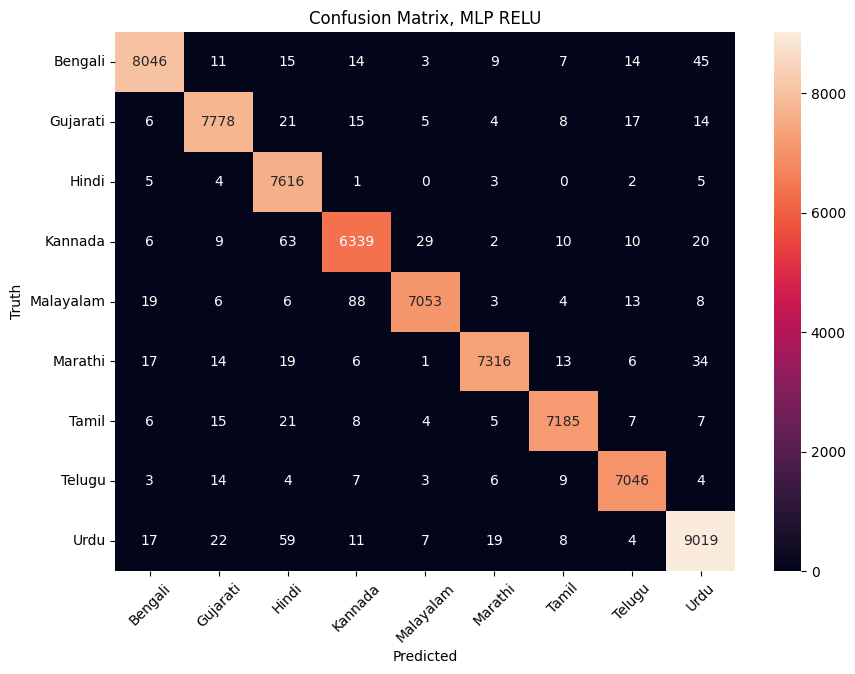

In [7]:
cm = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(0.5, 9.5), mlp.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), mlp.classes_, rotation=0)
plt.title('Confusion Matrix, MLP RELU')
plt.show()

In [8]:
tan_h = MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
tan_h.fit(X_train, y_train)

Iteration 1, loss = 0.57201593
Validation score: 0.935998
Iteration 2, loss = 0.17075083
Validation score: 0.963230
Iteration 3, loss = 0.10909820
Validation score: 0.970321
Iteration 4, loss = 0.08474298
Validation score: 0.975027
Iteration 5, loss = 0.07119121
Validation score: 0.977662
Iteration 6, loss = 0.06282662
Validation score: 0.978917
Iteration 7, loss = 0.05713175
Validation score: 0.979168
Iteration 8, loss = 0.05197589
Validation score: 0.981552
Iteration 9, loss = 0.04851480
Validation score: 0.981113
Iteration 10, loss = 0.04583107
Validation score: 0.983184
Iteration 11, loss = 0.04406408
Validation score: 0.982556
Iteration 12, loss = 0.04186509
Validation score: 0.983498
Iteration 13, loss = 0.04001972
Validation score: 0.983623
Iteration 14, loss = 0.03814055
Validation score: 0.983184
Iteration 15, loss = 0.03701477
Validation score: 0.984125
Iteration 16, loss = 0.03596886
Validation score: 0.984188
Iteration 17, loss = 0.03446976
Validation score: 0.984878
Iterat

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42,
              verbose=True)

In [9]:
tan_h_predictions = tan_h.predict(X_test)
accuracy = accuracy_score(y_test, tan_h_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, tan_h_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.9839828994758573
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.98      0.99      0.99      8164
    Gujarati       0.98      0.99      0.99      7868
       Hindi       0.97      0.99      0.98      7636
     Kannada       0.97      0.97      0.97      6488
   Malayalam       0.99      0.98      0.98      7200
     Marathi       0.98      0.99      0.98      7426
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.99      0.99      0.99      7096
        Urdu       0.99      0.97      0.98      9166

    accuracy                           0.98     68302
   macro avg       0.98      0.98      0.98     68302
weighted avg       0.98      0.98      0.98     68302



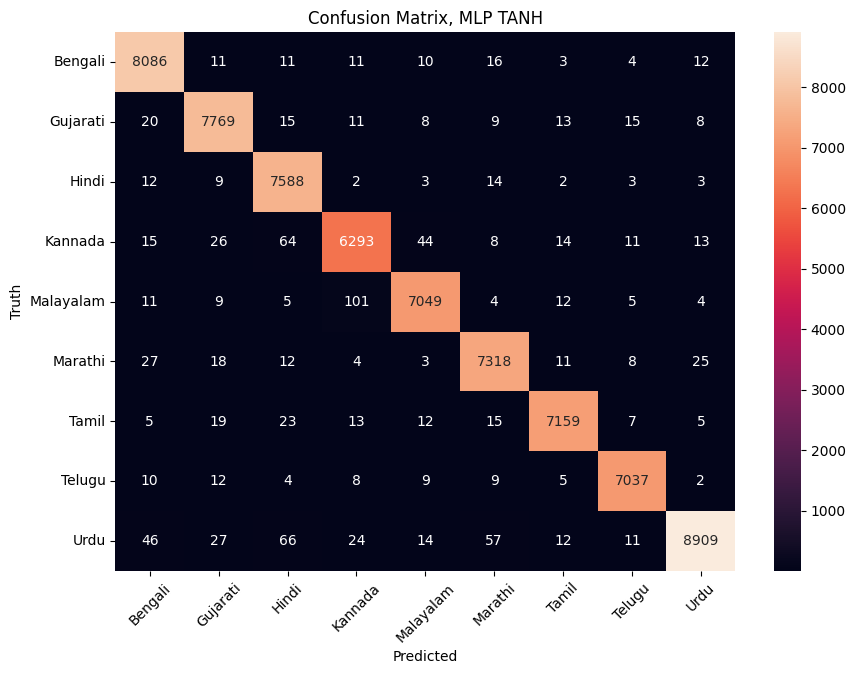

In [10]:
cm = confusion_matrix(y_test, tan_h_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(0.5, 9.5), tan_h.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), tan_h.classes_, rotation=0)
plt.title('Confusion Matrix, MLP TANH')
plt.show()

In [11]:
logistic = MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
logistic.fit(X_train, y_train)

Iteration 1, loss = 1.54039828
Validation score: 0.779570
Iteration 2, loss = 0.62592280
Validation score: 0.874694
Iteration 3, loss = 0.38902065
Validation score: 0.913597
Iteration 4, loss = 0.27487613
Validation score: 0.934429
Iteration 5, loss = 0.20651259
Validation score: 0.948798
Iteration 6, loss = 0.16564867
Validation score: 0.956705
Iteration 7, loss = 0.14141120
Validation score: 0.960909
Iteration 8, loss = 0.12555525
Validation score: 0.964297
Iteration 9, loss = 0.11377336
Validation score: 0.968501
Iteration 10, loss = 0.10507337
Validation score: 0.969254
Iteration 11, loss = 0.09821535
Validation score: 0.969881
Iteration 12, loss = 0.09189425
Validation score: 0.971764
Iteration 13, loss = 0.08693974
Validation score: 0.973144
Iteration 14, loss = 0.08262956
Validation score: 0.973521
Iteration 15, loss = 0.07883349
Validation score: 0.975027
Iteration 16, loss = 0.07602263
Validation score: 0.975842
Iteration 17, loss = 0.07266490
Validation score: 0.977035
Iterat

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42,
              verbose=True)

In [12]:
logistic_predictions = logistic.predict(X_test)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, logistic_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.983089807033469
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.98      0.99      0.99      8164
    Gujarati       0.99      0.99      0.99      7868
       Hindi       0.99      0.98      0.99      7636
     Kannada       0.95      0.97      0.96      6488
   Malayalam       0.98      0.98      0.98      7200
     Marathi       0.99      0.98      0.98      7426
       Tamil       0.99      0.99      0.99      7258
      Telugu       0.99      0.99      0.99      7096
        Urdu       0.98      0.98      0.98      9166

    accuracy                           0.98     68302
   macro avg       0.98      0.98      0.98     68302
weighted avg       0.98      0.98      0.98     68302



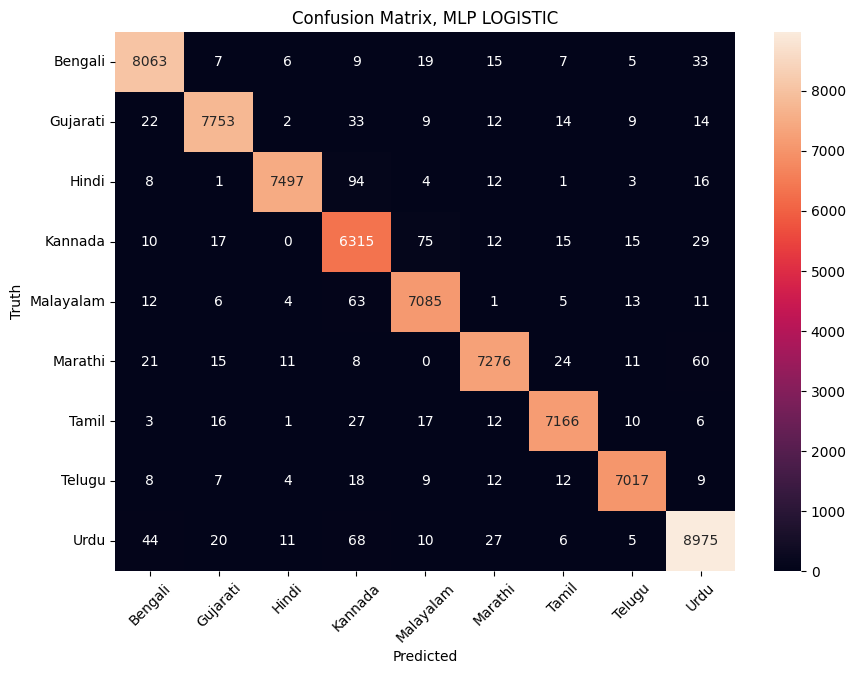

In [13]:
cm = confusion_matrix(y_test, logistic_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(0.5, 9.5), logistic.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), logistic.classes_, rotation=0)  
plt.title('Confusion Matrix, MLP LOGISTIC')

plt.show()

In [14]:
identity = MLPClassifier(activation='identity', hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42, verbose=True, solver='adam', early_stopping=True)
identity.fit(X_train, y_train)

Iteration 1, loss = 0.61930833
Validation score: 0.871808
Iteration 2, loss = 0.43031183
Validation score: 0.880530
Iteration 3, loss = 0.41669821
Validation score: 0.878145
Iteration 4, loss = 0.41094067
Validation score: 0.881534
Iteration 5, loss = 0.40686825
Validation score: 0.881283
Iteration 6, loss = 0.40479714
Validation score: 0.881283
Iteration 7, loss = 0.40272856
Validation score: 0.884169
Iteration 8, loss = 0.40148706
Validation score: 0.881973
Iteration 9, loss = 0.39989866
Validation score: 0.882537
Iteration 10, loss = 0.39887737
Validation score: 0.885236
Iteration 11, loss = 0.39882141
Validation score: 0.884734
Iteration 12, loss = 0.39853417
Validation score: 0.880843
Iteration 13, loss = 0.39851968
Validation score: 0.883604
Iteration 14, loss = 0.39707047
Validation score: 0.882788
Iteration 15, loss = 0.39763684
Validation score: 0.883541
Iteration 16, loss = 0.39663937
Validation score: 0.882287
Iteration 17, loss = 0.39627936
Validation score: 0.879965
Iterat

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(50, 30, 20), max_iter=100, random_state=42,
              verbose=True)

In [15]:
identity_predictions = identity.predict(X_test)
accuracy = accuracy_score(y_test, identity_predictions)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, identity_predictions)
print(f'Classification Report:\n{report}')

Accuracy: 0.8861965974642031
Classification Report:
              precision    recall  f1-score   support

     Bengali       0.86      0.90      0.88      8164
    Gujarati       0.94      0.95      0.94      7868
       Hindi       0.91      0.94      0.93      7636
     Kannada       0.94      0.91      0.92      6488
   Malayalam       0.92      0.92      0.92      7200
     Marathi       0.83      0.75      0.79      7426
       Tamil       0.94      0.92      0.93      7258
      Telugu       0.91      0.87      0.89      7096
        Urdu       0.77      0.81      0.79      9166

    accuracy                           0.89     68302
   macro avg       0.89      0.89      0.89     68302
weighted avg       0.89      0.89      0.89     68302



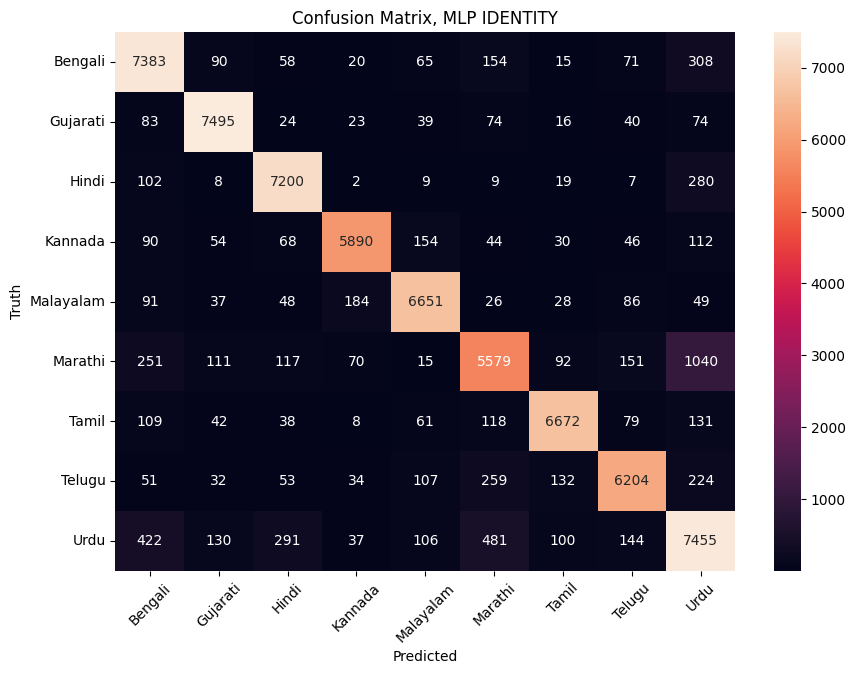

In [16]:
cm = confusion_matrix(y_test, identity_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.xticks(np.arange(0.5, 9.5), identity.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), identity.classes_, rotation=0)
plt.title('Confusion Matrix, MLP IDENTITY')

plt.show()

In [37]:
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

In [29]:
model = Sequential()
model.add(Dense(134, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(268, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(134, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.2823 - accuracy: 0.9132 - val_loss: 0.0755 - val_accuracy: 0.9765
Epoch 2/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.1173 - accuracy: 0.9647 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 3/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.0932 - accuracy: 0.9722 - val_loss: 0.0455 - val_accuracy: 0.9862
Epoch 4/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0413 - val_accuracy: 0.9871
Epoch 5/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.0785 - accuracy: 0.9756 - val_loss: 0.0382 - val_accuracy: 0.9879
Epoch 6/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.0747 - accuracy: 0.9773 - val_loss: 0.0375 - val_accuracy: 0.9873
Epoch 7/50
4981/4981 [==============================] - 6s 1ms/step - loss: 0.0713 - accuracy: 0.9784 - val_loss: 0.0402 - val_accuracy:

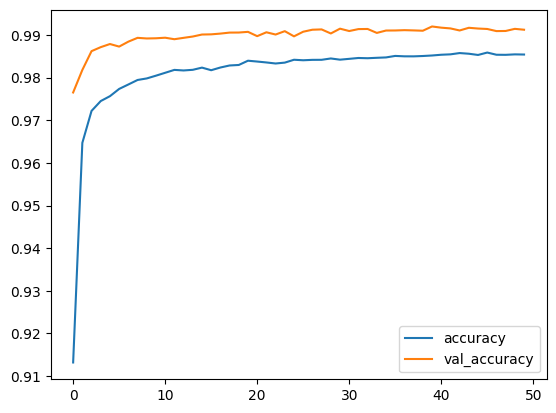

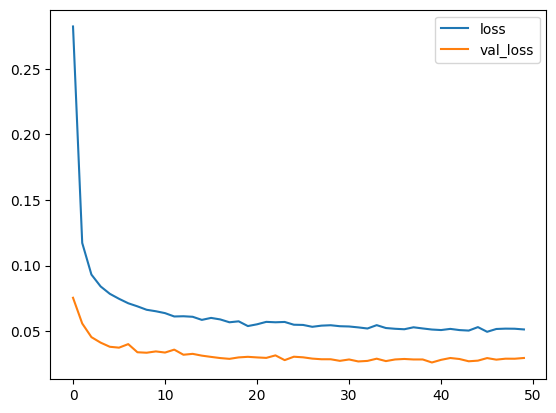

In [31]:
history_df = pd.DataFrame(history.history)

history_df[['accuracy', 'val_accuracy']].plot()
plt.show()

history_df[['loss', 'val_loss']].plot()
plt.show()

In [32]:
model.evaluate(X_test, y_test)

2135/2135 [==============================] - 1s 471us/step - loss: 0.0296 - accuracy: 0.9912


[0.029620202258229256, 0.9912154674530029]

In [33]:
y_pred = model.predict(X_test)
y_pred = [y.argmax() for y in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

2135/2135 [==============================] - 1s 383us/step
Accuracy: 0.9912154841732307
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8164
           1       0.99      0.99      0.99      7868
           2       0.97      1.00      0.98      7636
           3       0.99      0.98      0.98      6488
           4       0.99      0.99      0.99      7200
           5       0.99      0.99      0.99      7426
           6       1.00      0.99      0.99      7258
           7       1.00      0.99      1.00      7096
           8       1.00      0.99      0.99      9166

    accuracy                           0.99     68302
   macro avg       0.99      0.99      0.99     68302
weighted avg       0.99      0.99      0.99     68302



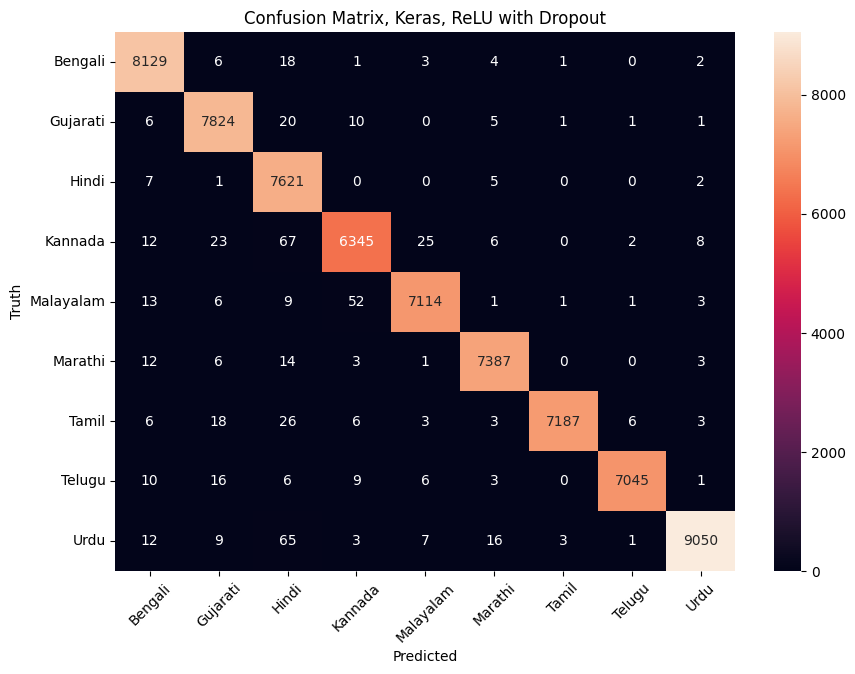

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
plt.xticks(np.arange(0.5, 9.5), labelEncoder.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), labelEncoder.classes_, rotation=0)
plt.title('Confusion Matrix, Keras, ReLU with Dropout')
plt.show()

In [41]:
with open('models/keras_mlp_relu_dropout.pkl', 'wb') as f:
    pickle.dump(model, f)
